In [2]:
import pandas as pd

df = pd.read_csv('wines_SPA.csv')
print(df.describe())

            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000


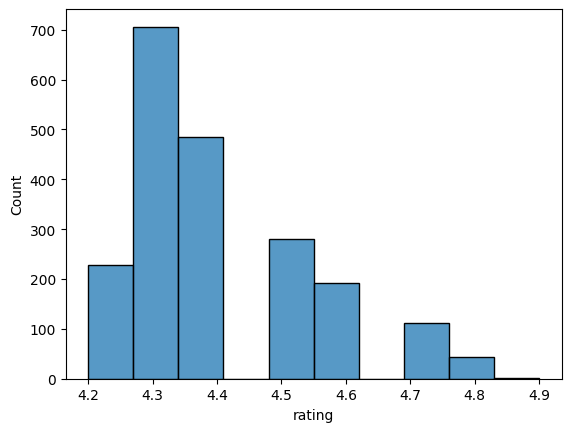

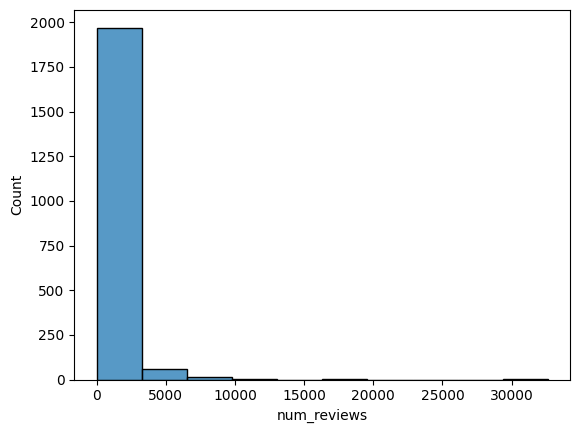

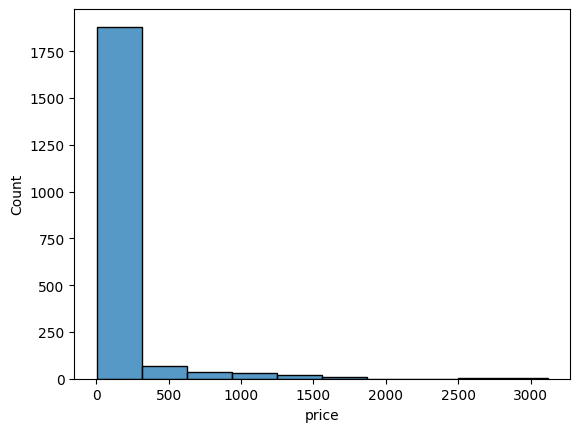

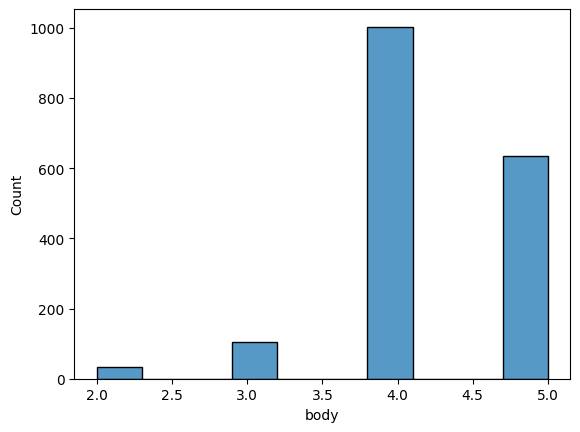

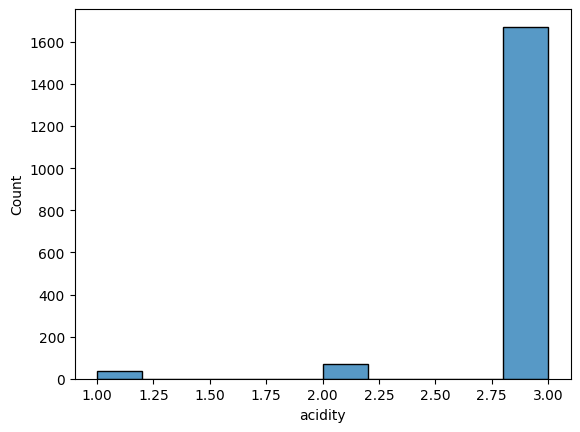

In [26]:
numerical_attributes = ['rating', 'num_reviews', 'price', 'body', 'acidity']

import seaborn as sns
import matplotlib.pyplot as plt

for attribute in numerical_attributes:
    sns.histplot(df[attribute],
                bins=10
                )
    plt.show()
    





In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

                    winery             wine  year  rating  num_reviews  \
1800        Bodega Tameran       Marmajuelo  2020     4.3           27   
2036        Ramon do Casar       Treixadura  2020     4.2          407   
2039              Binigrau           Nounat  2020     4.2          404   
2050          La Vicalanda          Reserva  2015     4.2          420   
2051       Enrique Mendoza       Santa Rosa  2017     4.2          420   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region  price                  type  body  acidity  
1800  Espana      Gran Canaria  29

In [8]:
df = df.drop_duplicates(subset=numerical_attributes)
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


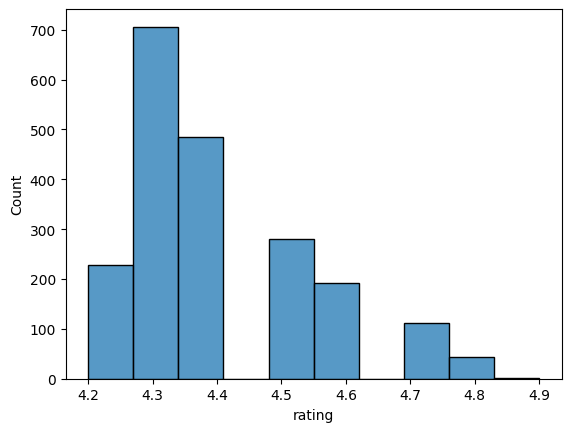

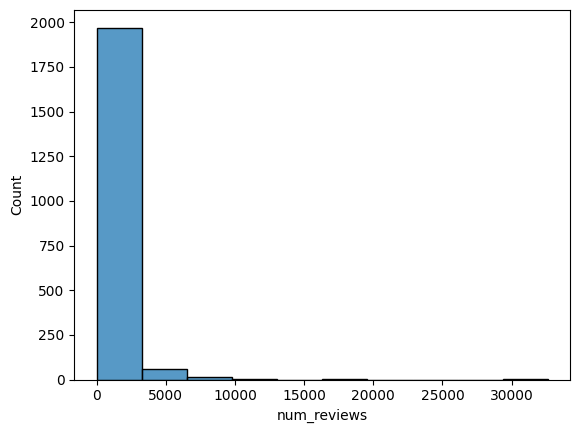

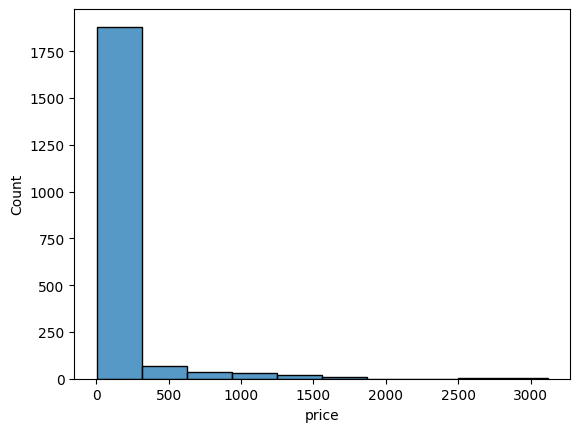

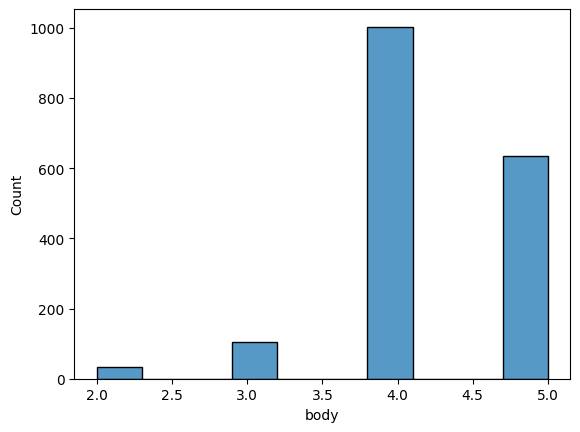

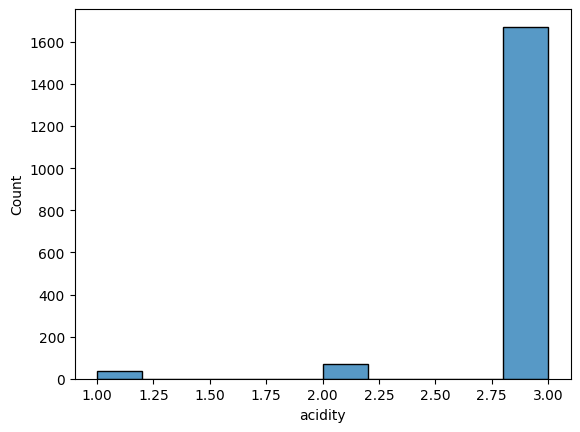

In [9]:
for attribute in numerical_attributes:
    sns.histplot(df[attribute],
                bins=10
                )
    plt.show()
    

In [13]:
# Step 1: Identify columns to compare (all except "M")
compare_cols = [col for col in df.columns if col not in ['body', 'acidity']]

# Step 2: Split into rows with and without missing "body"
df_missing = df[df['body'].isna()]
df_not_missing = df[df['body'].notna()]

print(df_missing.describe())
print(df_not_missing.describe())


# Step 3: Find rows in df_missing that have a match in df_not_missing on other columns
duplicates_to_drop = df_missing.merge(df_not_missing, on=compare_cols, how='inner')
print(duplicates_to_drop.describe())

# Step 4: Drop these duplicates from the original DataFrame
df_cleaned = df.drop(duplicates_to_drop.index)

           rating  num_reviews       price  body  acidity
count  271.000000   271.000000  271.000000   0.0      0.0
mean     4.329520   767.516605   45.820421   NaN      NaN
std      0.088691  1332.171541   42.186554   NaN      NaN
min      4.200000    25.000000    5.500000   NaN      NaN
25%      4.300000    80.000000   23.950000   NaN      NaN
50%      4.300000   241.000000   35.100000   NaN      NaN
75%      4.400000   434.000000   53.325000   NaN      NaN
max      4.700000  7401.000000  425.000000   NaN      NaN
            rating   num_reviews        price         body      acidity
count  1777.000000   1777.000000  1777.000000  1777.000000  1777.000000
mean      4.412043    544.481711   148.879392     4.258863     2.921216
std       0.151052   1380.719629   289.323828     0.652836     0.334713
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.300000     56.000000    33.030000     4.000000     3.000000
50%       4.400000    134.000000    58.260000 

In [14]:
print(df_cleaned.describe())

            rating   num_reviews        price         body      acidity
count  2024.000000   2024.000000  2024.000000  1753.000000  1753.000000
mean      4.396294    573.993577   130.262202     4.250428     2.922989
std       0.140970   1383.209543   266.945523     0.652123     0.329836
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.300000     57.000000    31.630000     4.000000     3.000000
50%       4.400000    139.000000    52.650000     4.000000     3.000000
75%       4.500000    483.250000   104.955000     5.000000     3.000000
max       4.800000  32624.000000  3119.080000     5.000000     3.000000


In [19]:
print(df_cleaned['year'].unique())
print(df_cleaned.isna().sum())

['2010' '1979' '1946' '2004' '2005' '2020' '2014' '1985' '1929' '1999'
 '2007' '2012' '2017' '2009' '2008' '2016' '2011' '2015' '2018' nan '2006'
 '2000' '2003' '2002' '1991' '1994' '1990' '1989' '1987' '2013' '1996'
 '1986' '1981' '2001' '1968' '1964' '1982' '1995' '1974' '1998' '1983'
 '1955' '1980' '1972' '1953' '2019' 'N.V.' '1958' '1942' '1965' '1992'
 '1973' '1997' '1967' '1975' '1910' '1961' '1954' '1962' '1988' '1969'
 '1951' '1928' '1976' '1949' '2021' '1959' '1922' '1978' '1970' '1925']
winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64


In [23]:
print(df_cleaned[df_cleaned['year'] == 'N.V.'].describe())

          rating   num_reviews       price       body    acidity
count  69.000000     69.000000   69.000000  60.000000  60.000000
mean    4.365217    735.217391   72.125652   4.133333   2.733333
std     0.123462   3911.410175   69.493783   0.342803   0.685607
min     4.200000     25.000000    4.990000   4.000000   1.000000
25%     4.300000     48.000000   33.500000   4.000000   3.000000
50%     4.300000     89.000000   50.000000   4.000000   3.000000
75%     4.400000    405.000000   85.400000   4.000000   3.000000
max     4.700000  32624.000000  380.000000   5.000000   3.000000


In [25]:
df_cleaned['year'] = df_cleaned['year'].replace('N.V.', pd.NA)

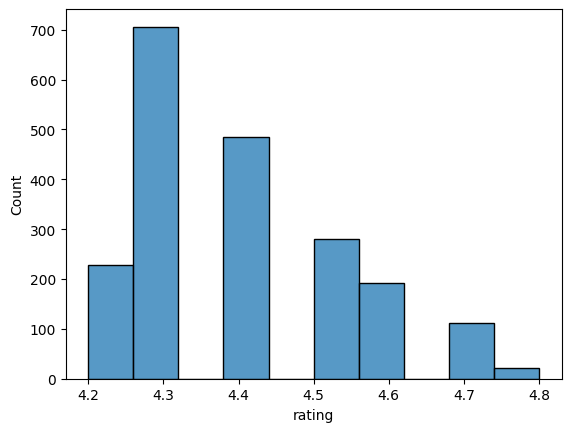

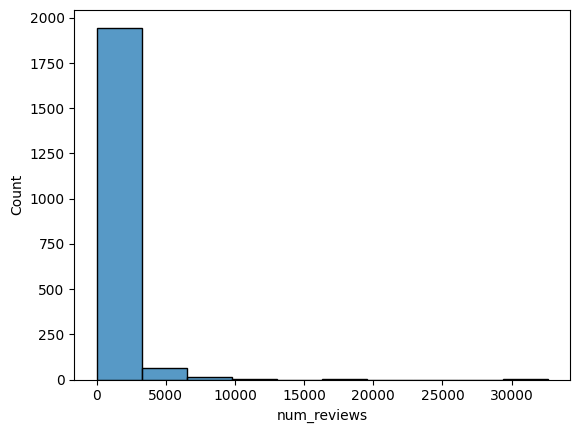

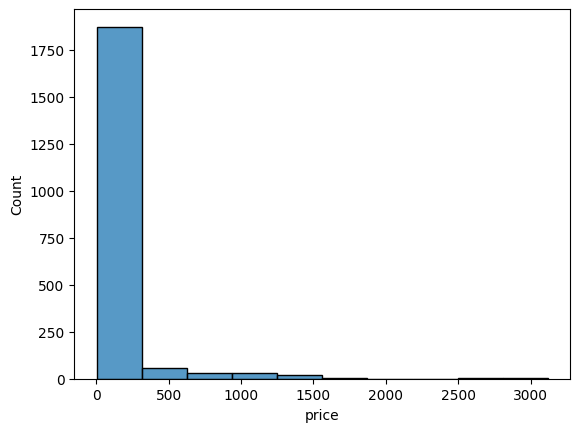

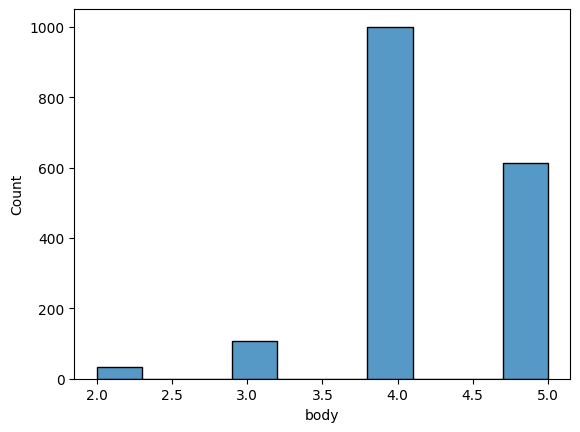

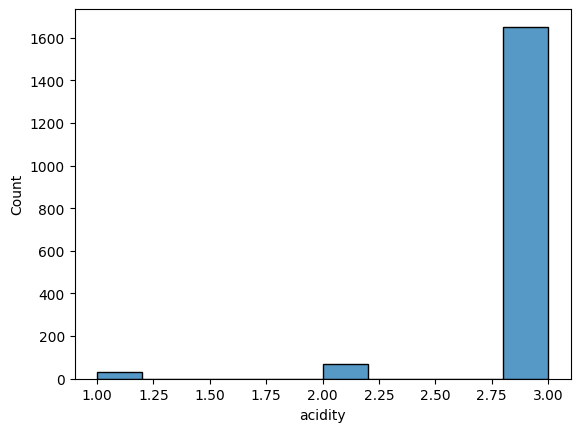

In [27]:
for attribute in numerical_attributes:
    sns.histplot(df_cleaned[attribute],
                bins=10
                )
    plt.show()

In [29]:
# remove all examples with missing values

df_no_na = df_cleaned.dropna()
df_no_na = df_no_na.drop_duplicates()
print(df_no_na.describe())

            rating   num_reviews        price         body      acidity
count  1691.000000   1691.000000  1691.000000  1691.000000  1691.000000
mean      4.407510    528.389119   145.462060     4.254287     2.930219
std       0.145127   1140.006282   288.651746     0.660221     0.307467
min       4.200000     25.000000     6.260000     2.000000     1.000000
25%       4.300000     56.000000    32.900000     4.000000     3.000000
50%       4.400000    134.000000    56.950000     4.000000     3.000000
75%       4.500000    499.000000   120.950000     5.000000     3.000000
max       4.800000  16505.000000  3119.080000     5.000000     3.000000


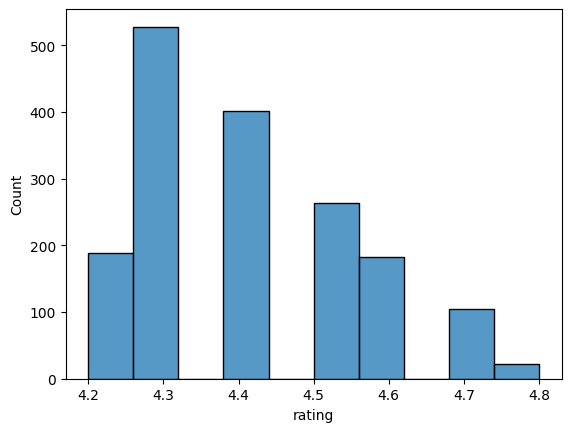

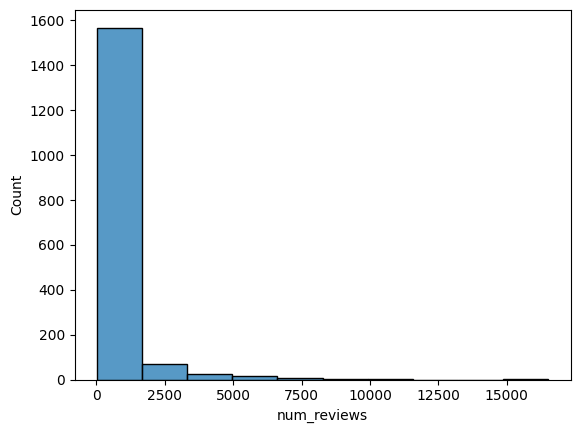

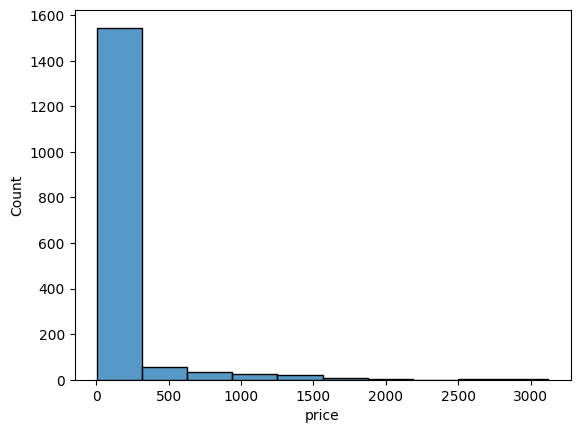

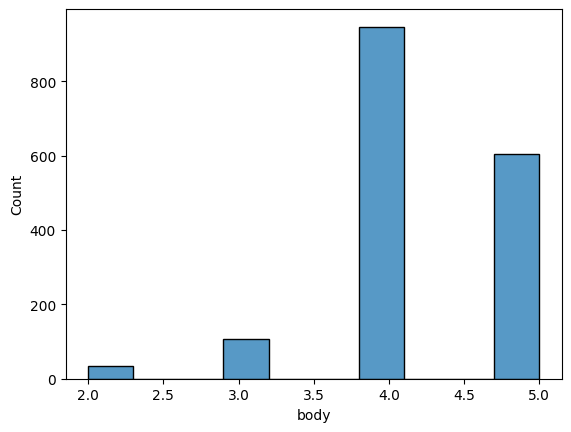

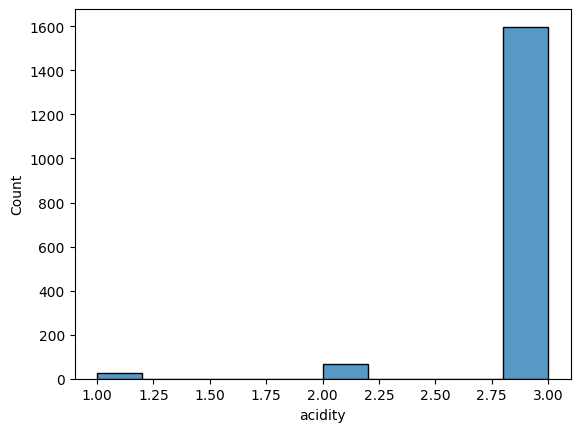

In [31]:
for attribute in numerical_attributes:
    sns.histplot(df_no_na[attribute],
                bins=10
                )
    plt.show()

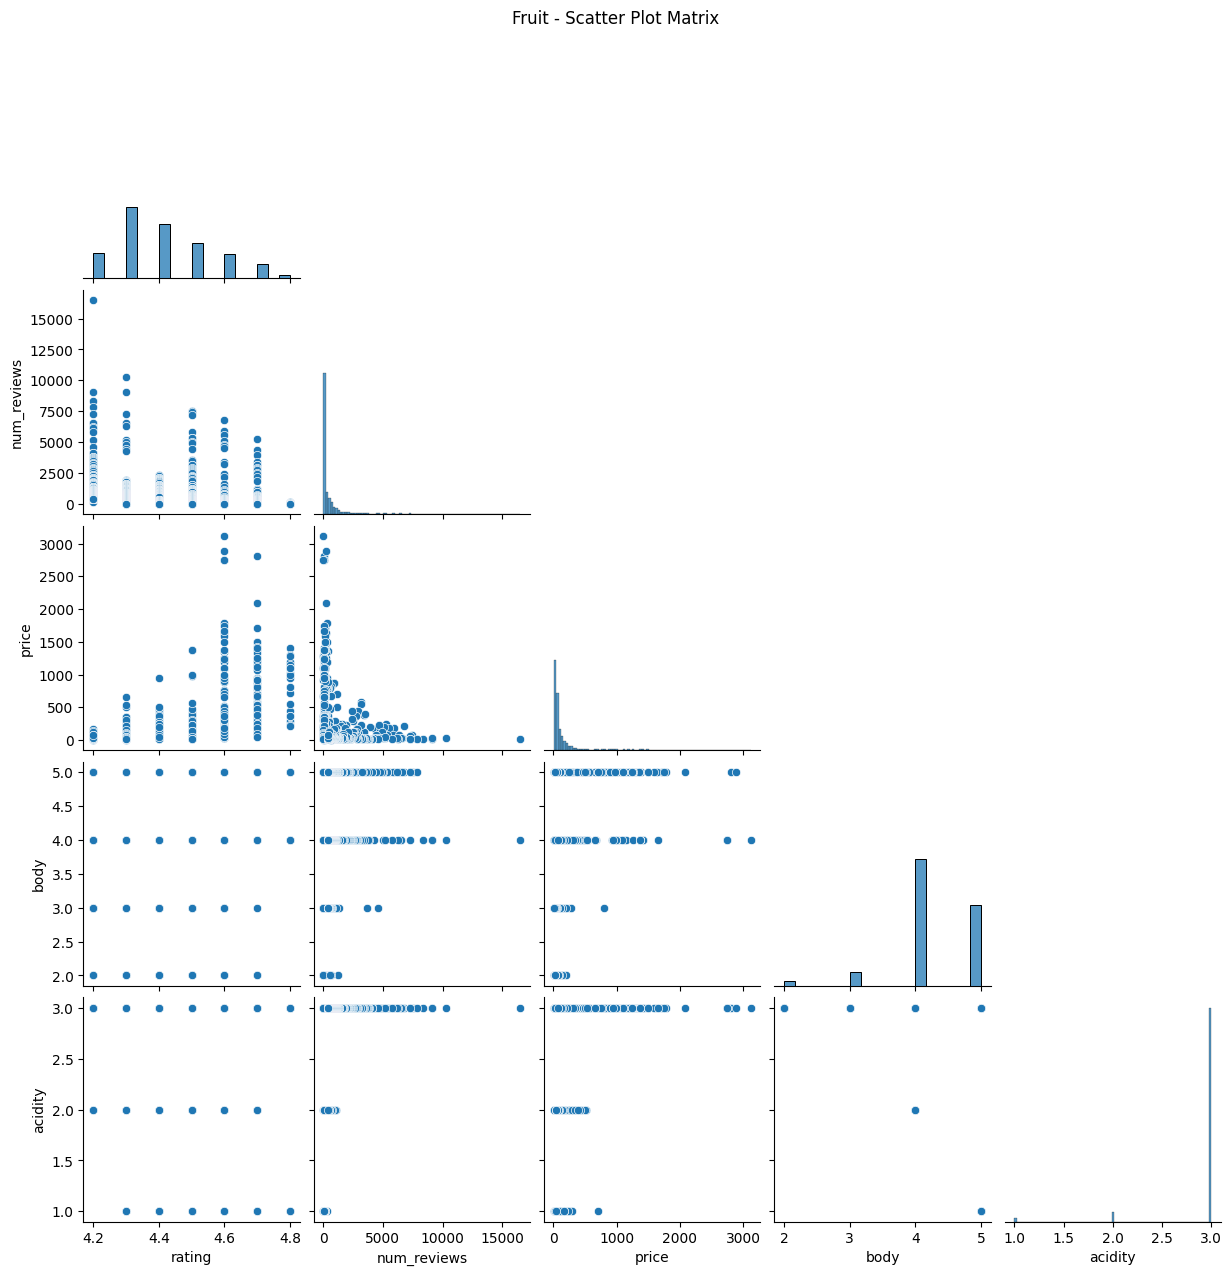

In [34]:

sns.pairplot(df_no_na[numerical_attributes], 
             corner=True
             )
plt.suptitle("Fruit - Scatter Plot Matrix", y=1.02)
plt.show()